In [55]:
import sqlite3
import pandas as pd

In [56]:
db_path = "/Users/armaan/Desktop/wildfire_project/data/FPA_FOD_20170508.sqlite"
conn = sqlite3.connect(db_path)

In [57]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,spatial_ref_sys
1,spatialite_history
2,sqlite_sequence
3,geometry_columns
4,spatial_ref_sys_aux
5,views_geometry_columns
6,virts_geometry_columns
7,geometry_columns_statistics
8,views_geometry_columns_statistics
9,virts_geometry_columns_statistics


In [58]:
# df_fire = pd.read_sql("SELECT * FROM Fires;", conn)
df_fire = pd.read_sql("SELECT * FROM Fires LIMIT 100000;", conn)

In [59]:
df_fire.head()


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [60]:
df_fire.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OBJECTID                    100000 non-null  int64  
 1   FOD_ID                      100000 non-null  int64  
 2   FPA_ID                      100000 non-null  object 
 3   SOURCE_SYSTEM_TYPE          100000 non-null  object 
 4   SOURCE_SYSTEM               100000 non-null  object 
 5   NWCG_REPORTING_AGENCY       100000 non-null  object 
 6   NWCG_REPORTING_UNIT_ID      100000 non-null  object 
 7   NWCG_REPORTING_UNIT_NAME    100000 non-null  object 
 8   SOURCE_REPORTING_UNIT       100000 non-null  object 
 9   SOURCE_REPORTING_UNIT_NAME  100000 non-null  object 
 10  LOCAL_FIRE_REPORT_ID        100000 non-null  object 
 11  LOCAL_INCIDENT_ID           41077 non-null   object 
 12  FIRE_CODE                   42422 non-null   object 
 13  FIRE_NAME      

In [61]:
df_fire.describe()


,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE
count,100000.000000,100000.00000,100000.000000,1.000000e+05,100000.000000,100000.000000,9.989000e+04,99890.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,50464.64699,1999.554680,2.451578e+06,196.668260,3.266140,2.451577e+06,198.626189,134.709221,39.738053,-110.625525,6.201420
std,28867.657797,29228.57577,6.448965,2.354946e+03,62.008893,2.897294,2.355731e+03,62.946179,2975.073591,5.275926,11.681800,2.898899
min,1.000000,1.00000,1992.000000,2.448622e+06,1.000000,1.000000,2.448622e+06,1.000000,0.010000,28.122222,-150.200000,5.000000
25%,25000.750000,25117.75000,1994.000000,2.449558e+06,169.000000,1.000000,2.449558e+06,170.000000,0.100000,34.825000,-119.076875,5.000000
50%,50000.500000,50344.50000,1996.000000,2.450308e+06,205.000000,1.000000,2.450308e+06,207.000000,0.100000,39.310000,-113.898333,5.000000
75%,75000.250000,75861.25000,2006.000000,2.453992e+06,232.000000,5.000000,2.454002e+06,235.000000,1.000000,44.411389,-107.540000,5.000000
max,100000.000000,101072.00000,2009.000000,2.455196e+06,366.000000,9.000000,2.455196e+06,366.000000,427696.000000,61.036667,-70.812500,14.000000


In [62]:
df_fire.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [63]:
import numpy as np

In [64]:
usecols = [
    "FIRE_YEAR", "DISCOVERY_DATE", "DISCOVERY_DOY", "DISCOVERY_TIME",
    "STAT_CAUSE_CODE", "STAT_CAUSE_DESCR",
    "FIRE_SIZE", "FIRE_SIZE_CLASS",
    "LATITUDE", "LONGITUDE",
    "STATE", "COUNTY", "FIPS_NAME",
    "OWNER_DESCR"
]

df = df_fire[usecols].copy()
print("Initial shape:", df.shape)

Initial shape: (100000, 14)


In [65]:
df = df.dropna(subset=["LATITUDE", "LONGITUDE"])
df = df[df["FIRE_YEAR"].notna()]

print("After dropping missing geolocation/time:", df.shape)

After dropping missing geolocation/time: (100000, 14)


In [66]:
def convert_time(val):
    try:
        val = int(val)
        hour = val // 100
        if 0 <= hour <= 23:
            return hour
        return np.nan
    except:
        return np.nan

df["DISCOVERY_HOUR"] = df["DISCOVERY_TIME"].apply(convert_time)
df = df.dropna(subset=["DISCOVERY_HOUR"])

print("After fixing discovery time:", df.shape)

After fixing discovery time: (100000, 15)


In [67]:
# Classes A–G represent increasing size
df["FIRE_SIZE_CLASS"] = df["FIRE_SIZE_CLASS"].astype("category")

# Binary label for large fires (C or above)
df["IS_LARGE_FIRE"] = df["FIRE_SIZE_CLASS"].apply(lambda x: 1 if x in ["C","D","E","F","G"] else 0)


In [68]:
df["OWNER_DESCR"] = df["OWNER_DESCR"].fillna("UNKNOWN")

In [69]:
df["STAT_CAUSE_DESCR"] = df["STAT_CAUSE_DESCR"].fillna("Unknown")

In [70]:
df = df[df["FIRE_YEAR"] >= 1992]  

print("After year filtering:", df.shape)

After year filtering: (100000, 16)


In [71]:
df = df.reset_index(drop=True)

df.head(10)

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_NAME,OWNER_DESCR,DISCOVERY_HOUR,IS_LARGE_FIRE
0,2005,2453403.5,33,1300,9.0,Miscellaneous,0.10,A,40.036944,-121.005833,CA,63,Plumas,USFS,13,0
1,2004,2453137.5,133,0845,1.0,Lightning,0.25,A,38.933056,-120.404444,CA,61,Placer,USFS,8,0
2,2004,2453156.5,152,1921,5.0,Debris Burning,0.10,A,38.984167,-120.735556,CA,17,El Dorado,STATE OR PRIVATE,19,0
3,2004,2453184.5,180,1600,1.0,Lightning,0.10,A,38.559167,-119.913333,CA,3,Alpine,USFS,16,0
4,2004,2453184.5,180,1600,1.0,Lightning,0.10,A,38.559167,-119.933056,CA,3,Alpine,USFS,16,0
5,2004,2453186.5,182,1800,1.0,Lightning,0.10,A,38.635278,-120.103611,CA,5,Amador,USFS,18,0
6,2004,2453187.5,183,1800,1.0,Lightning,0.10,A,38.688333,-120.153333,CA,17,El Dorado,USFS,18,0
7,2005,2453437.5,67,1300,5.0,Debris Burning,0.80,B,40.968056,-122.433889,CA,None,None,STATE OR PRIVATE,13,0
8,2005,2453444.5,74,1200,5.0,Debris Burning,1.00,B,41.233611,-122.283333,CA,None,None,STATE OR PRIVATE,12,0
9,2004,2453187.5,183,1800,1.0,Lightning,0.10,A,38.548333,-120.149167,CA,5,Amador,USFS,18,0


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [73]:
categorical_cols = ["STAT_CAUSE_DESCR", "STATE", "OWNER_DESCR", "FIRE_SIZE_CLASS"]

encoders = {}

for col in categorical_cols:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col].astype(str))
    encoders[col] = enc

In [74]:
feature_cols = [
    "FIRE_YEAR",
    "DISCOVERY_DOY",
    "DISCOVERY_HOUR",
    "STAT_CAUSE_DESCR",
    "LATITUDE",
    "LONGITUDE",
    "STATE",
    "OWNER_DESCR"
]

target_col = "IS_LARGE_FIRE"

X = df[feature_cols]
y = df[target_col]


In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [76]:
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
y_pred = rf.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     22433
           1       0.55      0.14      0.22      2567

    accuracy                           0.90     25000
   macro avg       0.73      0.56      0.58     25000
weighted avg       0.87      0.90      0.87     25000



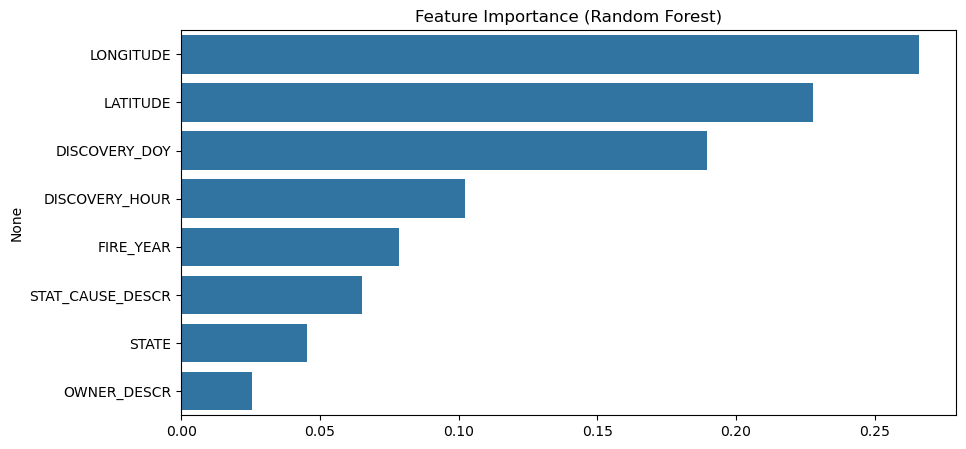

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [79]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Train before SMOTE:", X_train.shape, y_train.shape)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Train after SMOTE:", X_train_res.shape, y_train_res.shape)
print("Test (unchanged):", X_test.shape, y_test.shape)

Train before SMOTE: (75000, 8) (75000,)
Train after SMOTE: (134600, 8) (134600,)
Test (unchanged): (25000, 8) (25000,)


In [80]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=4   # helps detect large fires
)

xgb.fit(X_train_res, y_train_res)

y_proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print("=== XGBoost (default threshold 0.5) ===")
print(classification_report(y_test, y_pred))

=== XGBoost (default threshold 0.5) ===
              precision    recall  f1-score   support

           0       0.96      0.62      0.75     22433
           1       0.19      0.78      0.31      2567

    accuracy                           0.64     25000
   macro avg       0.58      0.70      0.53     25000
weighted avg       0.88      0.64      0.71     25000



In [81]:
from sklearn.metrics import precision_recall_curve
import numpy as np

prec, rec, thr = precision_recall_curve(y_test, y_proba)

f1_scores = 2 * (prec * rec) / (prec + rec + 1e-9)

best_idx = np.argmax(f1_scores)
best_threshold = thr[best_idx]

print("Best threshold:", best_threshold)
print("Best F1 score:", f1_scores[best_idx])

Best threshold: 0.85387254
Best F1 score: 0.39108187084693696


In [82]:
y_opt = (y_proba >= best_threshold).astype(int)

print("=== Threshold-Optimized Classification Report ===")
print(classification_report(y_test, y_opt))

=== Threshold-Optimized Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     22433
           1       0.37      0.42      0.39      2567

    accuracy                           0.87     25000
   macro avg       0.65      0.67      0.66     25000
weighted avg       0.87      0.87      0.87     25000



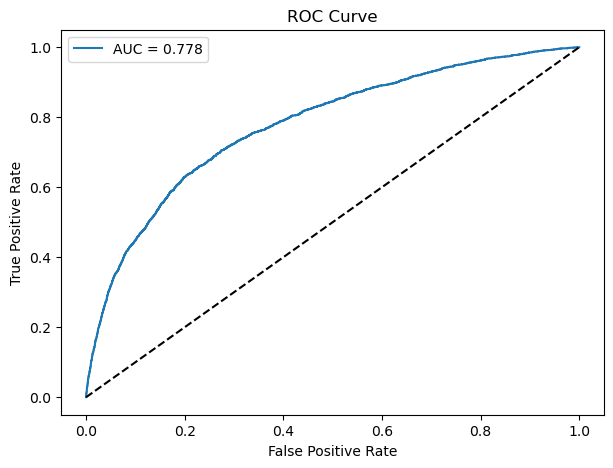

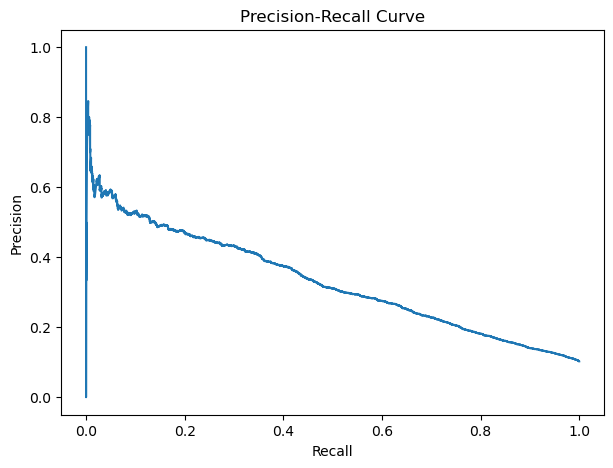

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(7,5))
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [110]:
df["FIRE_DATE"] = pd.to_datetime(df["FIRE_YEAR"].astype(str), format="%Y") \
                  + pd.to_timedelta(df["DISCOVERY_DOY"] - 1, unit="D")

df[["FIRE_YEAR", "DISCOVERY_DOY", "FIRE_DATE"]].head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_DATE
0,2005,33,2005-02-02
1,2004,133,2004-05-12
2,2004,152,2004-05-31
3,2004,180,2004-06-28
4,2004,180,2004-06-28


In [145]:
df_sub = df[df["FIRE_YEAR"] >= 2005].copy()
print(df_sub["FIRE_YEAR"].describe())
print(df_sub.shape)

count    41804.000000
mean      2006.957325
std          1.355216
min       2005.000000
25%       2006.000000
50%       2007.000000
75%       2008.000000
max       2009.000000
Name: FIRE_YEAR, dtype: float64
(41804, 20)


In [146]:
df_sub["LAT_ROUND"] = df_sub["LATITUDE"].round(2)
df_sub["LON_ROUND"] = df_sub["LONGITUDE"].round(2)

In [147]:
import requests
from functools import lru_cache

@lru_cache(maxsize=100000)
def fetch_nasa_power(lat, lon, date_str):
    """
    lat, lon: rounded floats
    date_str: 'YYYYMMDD'
    returns: dict with temperature, humidity, wind, or None if failed
    """
    base_url = "https://power.larc.nasa.gov/api/temporal/daily/point"
    params = {
        "parameters": "T2M,RH2M,WS10M",
        "community": "AG",
        "longitude": lon,
        "latitude": lat,
        "start": date_str,
        "end": date_str,
        "format": "JSON"
    }
    try:
        r = requests.get(base_url, params=params, timeout=10)
        r.raise_for_status()
        data = r.json()["properties"]["parameter"]
        return {
            "TEMP_2M": list(data["T2M"].values())[0],
            "RH_2M": list(data["RH2M"].values())[0],
            "WS10M": list(data["WS10M"].values())[0]
        }
    except Exception as e:
        return {"TEMP_2M": None, "RH_2M": None, "WS10M": None}


In [148]:
df_sub["NASA_KEY"] = (
    df_sub["LAT_ROUND"].astype(str) + "_" +
    df_sub["LON_ROUND"].astype(str) + "_" +
    df_sub["FIRE_DATE"].dt.strftime("%Y%m%d")
)

unique_keys = df_sub[["NASA_KEY", "LAT_ROUND", "LON_ROUND", "FIRE_DATE"]].drop_duplicates()

print("Unique keys before limiting:", len(unique_keys))


Unique keys before limiting: 41193


In [149]:
from tqdm import tqdm

unique_keys = unique_keys.sample(n=1200, random_state=42)
print("Unique keys after limiting:", len(unique_keys))

weather_records = []
for _, row in tqdm(unique_keys.iterrows(), total=len(unique_keys)):
    k = row["NASA_KEY"]
    lat = row["LAT_ROUND"]
    lon = row["LON_ROUND"]
    date_str = row["FIRE_DATE"].strftime("%Y%m%d")
    weather = fetch_nasa_power(lat, lon, date_str)
    weather["NASA_KEY"] = k
    weather_records.append(weather)

df_weather_nasa = pd.DataFrame(weather_records)
df_weather_nasa.head()


Unique keys after limiting: 1200


100%|██████████| 1200/1200 [1:10:18<00:00,  3.52s/it]   


,TEMP_2M,RH_2M,WS10M,NASA_KEY
0,16.21,42.01,2.71,48.5_-113.97_20070812
1,24.32,40.98,2.62,33.86_-109.41_20050721
2,23.02,48.79,4.15,47.35_-103.15_20080716
3,18.96,51.82,3.33,41.25_-105.43_20080706
4,20.44,86.30,4.57,30.56_-89.11_20060309


In [150]:
df_sub = df_sub.merge(df_weather_nasa, on="NASA_KEY", how="left")

In [151]:
df_sub[["TEMP_2M", "RH_2M", "WS10M"]].describe()

,TEMP_2M,RH_2M,WS10M
count,1211.000000,1211.000000,1211.000000
mean,17.972114,53.191272,2.595483
std,6.731695,17.753324,1.204825
min,-6.250000,7.680000,0.810000
25%,14.225000,39.985000,1.800000
50%,18.730000,52.520000,2.290000
75%,22.455000,66.770000,3.050000
max,33.030000,97.340000,11.760000


In [152]:
df_model = df_sub.dropna(subset=["TEMP_2M", "RH_2M", "WS10M"]).copy()
print(df_model.shape)
df_model.head()

(1211, 23)


,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,...,OWNER_DESCR,DISCOVERY_HOUR,IS_LARGE_FIRE,FIRE_DATE,LAT_ROUND,LON_ROUND,NASA_KEY,TEMP_2M,RH_2M,WS10M
7,2005,2453407.5,37,1900,7.0,0,0.1,0,35.931667,-81.716667,...,3,19,0,2005-02-06,35.93,-81.72,35.93_-81.72_20050206,1.75,75.85,2.03
40,2005,2453519.5,149,2000,4.0,1,0.1,0,48.964444,-115.185833,...,3,20,0,2005-05-29,48.96,-115.19,48.96_-115.19_20050529,10.23,65.17,2.28
61,2005,2453517.5,147,1700,1.0,5,0.1,0,36.016667,-106.716667,...,3,17,0,2005-05-27,36.02,-106.72,36.02_-106.72_20050527,17.66,57.77,2.87
144,2005,2453517.5,147,1430,1.0,5,0.1,0,33.368611,-108.600556,...,3,14,0,2005-05-27,33.37,-108.60,33.37_-108.6_20050527,15.02,75.46,1.97
212,2005,2453579.5,209,1830,1.0,5,0.1,0,38.197500,-118.730278,...,3,18,0,2005-07-28,38.20,-118.73,38.2_-118.73_20050728,21.92,39.40,2.04


In [161]:
feature_cols = [
    "FIRE_YEAR",
    "DISCOVERY_DOY",
    "DISCOVERY_HOUR",
    "LATITUDE",
    "LONGITUDE",
    "STAT_CAUSE_CODE",   
    # NASA features:
    "TEMP_2M",
    "RH_2M",
    "WS10M"
]

target_col = "IS_LARGE_FIRE"


In [162]:
X = df_model[feature_cols]
y = df_model[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [163]:
model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [164]:
y_pred = model.predict(X_test)
print("=== Hold-out (no SMOTE) ===")
print(classification_report(y_test, y_pred))

=== Hold-out (no SMOTE) ===
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       267
           1       0.33      0.08      0.13        36

    accuracy                           0.87       303
   macro avg       0.61      0.53      0.53       303
weighted avg       0.82      0.87      0.84       303



In [165]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

smote = SMOTE(random_state=42)

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline([
    ("smote", smote),
    ("model", xgb)
])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# F1 for the positive (large fire) class
f1_scores = cross_val_score(
    pipeline, X, y,
    scoring="f1",
    cv=kfold
)

# Macro F1 (both classes)
f1_macro_scores = cross_val_score(
    pipeline, X, y,
    scoring="f1_macro",
    cv=kfold
)

print("\n=== SMOTE + XGBoost (5-fold CV) ===")
print("F1 (class 1) scores:", f1_scores)
print("Mean F1 (class 1):", np.mean(f1_scores))

print("\nMacro F1 scores:", f1_macro_scores)
print("Mean Macro F1:", np.mean(f1_macro_scores))


=== SMOTE + XGBoost (5-fold CV) ===
F1 (class 1) scores: [0.19672131 0.19607843 0.23880597 0.36363636 0.42857143]
Mean F1 (class 1): 0.28476270104100093

Macro F1 scores: [0.5407136  0.5506951  0.55825191 0.63157895 0.67690254]
Mean Macro F1: 0.5916284183535849
